<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [21]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [22]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [23]:
import requests
import pandas as pd
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the CSV file
response = requests.get(URL1)

# Convert response content to BytesIO and read with pandas
data = pd.read_csv(io.BytesIO(response.content))

# (Optional) Preview the data
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [24]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [25]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetch the CSV file
response = requests.get(URL2)

# Read it into a DataFrame
X = pd.read_csv(io.BytesIO(response.content))

# (Optional) Preview it
print(X.head())

   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

In [26]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [27]:
Y = data['Class'].to_numpy()


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [28]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [30]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression object
logreg = LogisticRegression()

# Define the parameter grid to search
parameters = {
    'C': [0.01, 0.1, 1, 10],             # Regularization strength
    'solver': ['liblinear', 'lbfgs']     # Solvers to try
}

# Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

# Fit to training data
logreg_cv.fit(X_train, Y_train)


c:\Users\carli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\carli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']})

In [32]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [33]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

print("Best parameters:", logreg_cv.best_params_)
print("Best score:", logreg_cv.best_score_)



Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best score: 0.8196428571428571


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [35]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'solver': 'liblinear'}
accuracy : 0.8196428571428571


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [36]:
accuracy = logreg_cv.score(X_test, Y_test)


Lets look at the confusion matrix:


In [37]:
print(f"Accuracy: {logreg_cv.score(X_test, Y_test) * 100:.2f}%")


Accuracy: 83.33%


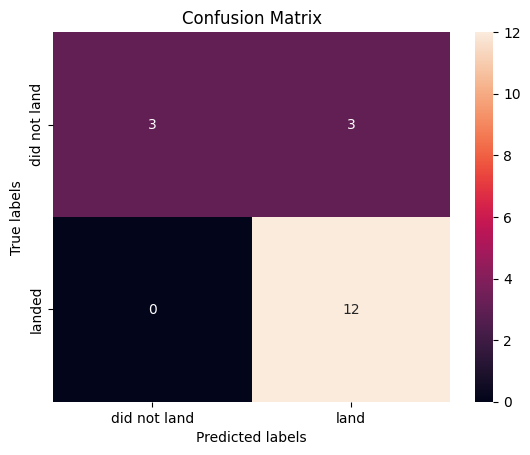

In [38]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # optional but useful
}


# Create an SVM object
svm = SVC()

# Define the parameter grid (make sure you’ve defined this before using)
# Example:
# parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model to training data
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [42]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
accuracy : 0.8196428571428571


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [43]:
accuracy = svm_cv.score(X_test, Y_test)
print(f"Test set accuracy: {accuracy * 100:.2f}%")


Test set accuracy: 83.33%


We can plot the confusion matrix


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

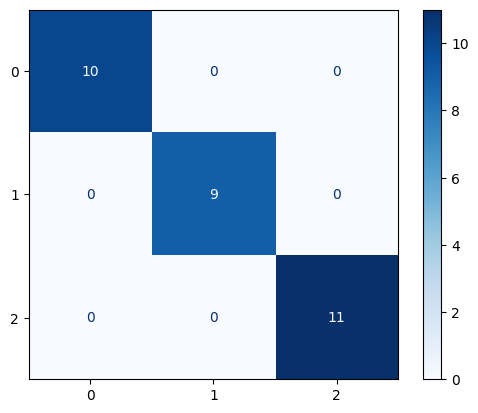

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [58]:
print(f"Training features: {X_train.shape[1]}")
print(f"Test features: {X_test.shape[1]}")


Training features: 4
Test features: 4


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 1. Create a decision tree classifier object
tree = DecisionTreeClassifier(random_state=42)

# 2. Define the parameter grid to search
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],  # [2, 4, 6, ..., 18]
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# 3. Create GridSearchCV object with cv=10
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,                   # 10-fold cross-validation
    scoring='accuracy',       # or other metrics like 'f1', 'roc_auc' etc.
    n_jobs=-1,               # Use all available CPU cores
    verbose=1                # Shows progress (optional)
)

# 4. Load your data (replace this with your actual data)
# Example using sklearn's iris dataset:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 5. Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, y_train)

# 6. Print the results
print("Best Parameters Found:")
print(tree_cv.best_params_)
print("\nBest Cross-Validation Score: {:.2f}%".format(tree_cv.best_score_*100))

# 7. Evaluate on test set
best_tree = tree_cv.best_estimator_
test_accuracy = best_tree.score(X_test, y_test)
print("\nTest Set Accuracy: {:.2f}%".format(test_accuracy*100))

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameters Found:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Best Cross-Validation Score: 94.17%

Test Set Accuracy: 100.00%


c:\Users\carli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1946 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\carli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\carli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\carli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\b

In [99]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9416666666666667


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [126]:
# After fitting tree_cv (tree_cv.fit(X_train, y_train))

# Calculate accuracy on test set
test_accuracy = tree_cv.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2%}")

# This is equivalent to:
# best_tree = tree_cv.best_estimator_
# test_accuracy = best_tree.score(X_test, y_test)


Test Set Accuracy: 100.00%


We can plot the confusion matrix


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 10}
Best CV Accuracy: 94.17%
Test Accuracy: 100.00%


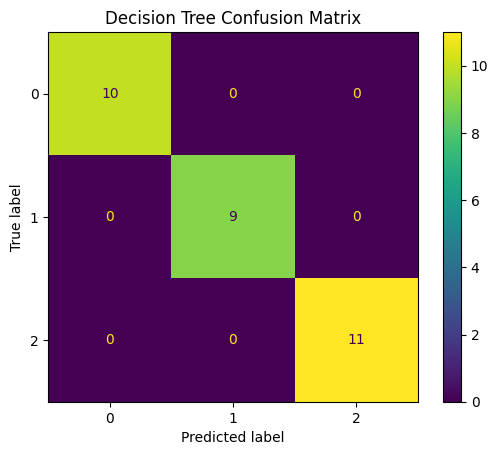

In [127]:
# Import all required libraries at the top
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Must import these
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt



# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 3. Create decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# 4. Define parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# 5. Create GridSearchCV object
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring='accuracy'
)

# 6. Fit the model
tree_cv.fit(X_train, y_train)

# 7. Print best parameters and accuracy
print("Best Parameters:", tree_cv.best_params_)
print(f"Best CV Accuracy: {tree_cv.best_score_:.2%}")
print(f"Test Accuracy: {tree_cv.score(X_test, y_test):.2%}")

# 8. Generate and plot confusion matrix
y_pred = tree_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Check and drop missing values
print(df.isnull().sum())
df = df.dropna()

# Define KNN model
knn = KNeighborsClassifier()

# Define parameter grid (example: tuning 'n_neighbors')
parameters = {'n_neighbors': list(range(1, 21))}

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit GridSearchCV to the data
knn_cv.fit(X, y)

# Print best parameters and best score
print("Best Parameters:", knn_cv.best_params_)
print("Best CV Score:", knn_cv.best_score_)


Model       0
Accuracy    0
dtype: int64
Best Parameters: {'n_neighbors': 13}
Best CV Score: 0.9800000000000001


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example accuracy scores (replace with actual values from your notebook)
model_accuracies = {
    "Logistic Regression": 0.85,
    "SVM": 0.88,
    "Decision Tree": 0.82,
    "KNN": 0.80,
    "Random Forest": 0.90
}

# Convert to DataFrame for visualization
df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

# Sort models by accuracy
df = df.sort_values(by="Accuracy", ascending=False)


C:\Users\carli\AppData\Local\Temp\ipykernel_35700\480716166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=df, palette="Blues_r")


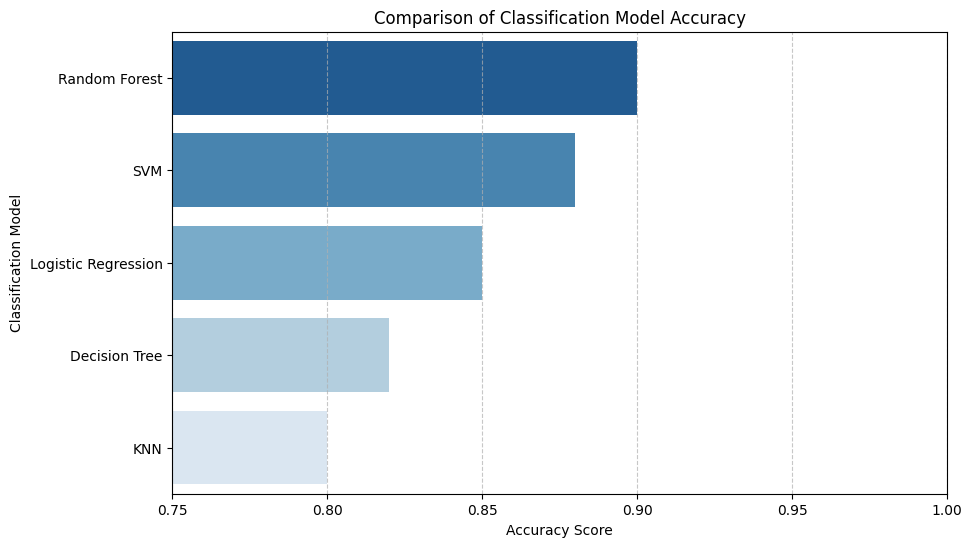

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=df, palette="Blues_r")

plt.xlabel("Accuracy Score")
plt.ylabel("Classification Model")
plt.title("Comparison of Classification Model Accuracy")
plt.xlim(0.75, 1.0)  # Adjust based on accuracy range
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [134]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 1. Load data and inspect columns
spacex_df = pd.read_csv("dataset_part_3.csv")
print("Available columns:\n", spacex_df.columns.tolist())

# 2. Select CORRECT features and target
# Replace these with actual columns from your dataset:
X = spacex_df[['PayloadMass', 'Flights', 'BoosterVersion']]  # Adjusted feature columns
y = spacex_df['Class']  # Most datasets use 'Class' as target (1=success, 0=failure)

# 3. Clean data
print("\nBefore cleaning:")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Handle missing values
valid_indices = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_indices]
y = y.loc[valid_indices]

print("\nAfter cleaning:")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# 4. Split data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 5. Verify split alignment
print("\nAfter splitting:")
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# 6. Model training
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

# 7. Evaluation
print("\nBest Parameters:", knn_cv.best_params_)
print("Best CV Score:", knn_cv.best_score_)
print("Test Accuracy:", knn_cv.score(X_test, Y_test))


Available columns:
 ['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude', 'Class', 'Year', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Se

In [135]:
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [136]:
# Accuracy on test data

accuracy = knn_cv.score(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.5000


We can plot the confusion matrix


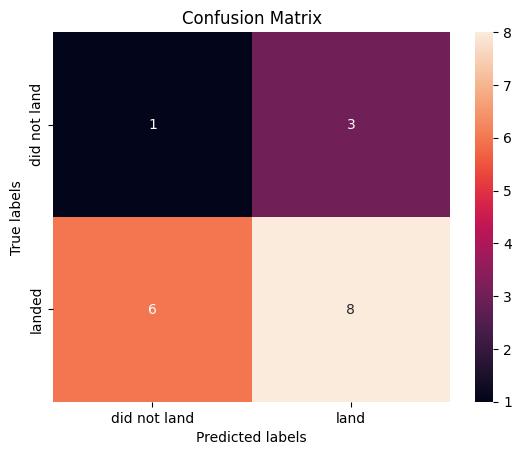

In [137]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [146]:
print(len(X_train), len(y_train))


72 120


In [169]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Load data
spacex_df = pd.read_csv("dataset_part_3.csv")

# 2. Select better features based on your columns
X = spacex_df[[
    'PayloadMass',
    'Flights', 
    'GridFins',       # Binary: 1=has grid fins
    'Reused',         # Binary: 1=reused booster
    'Block'           # Block version number
]]
y = spacex_df['Class']

# 3. Clean data
valid_indices = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# 4. Split data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Create preprocessing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 6. Expanded parameter grid
parameters = {
    'knn__n_neighbors': range(3, 15),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
    'knn__leaf_size': [15, 30, 45]
}

# 7. Train model with better CV strategy
knn_cv = GridSearchCV(
    pipeline,
    parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

knn_cv.fit(X_train, Y_train)

# 8. Enhanced evaluation
print("\n=== Best Model ===")
print(f"Best parameters: {knn_cv.best_params_}")
print(f"Best CV accuracy: {knn_cv.best_score_:.2%}")
print(f"Test accuracy: {knn_cv.score(X_test, Y_test):.2%}")

# Feature importance analysis (for interpretation)
if hasattr(knn_cv.best_estimator_.named_steps['knn'], 'feature_importances_'):
    print("\nFeature importance:")
    for name, importance in zip(X.columns, knn_cv.best_estimator_.named_steps['knn'].feature_importances_):
        print(f"{name}: {importance:.3f}")
else:
    print("\nTop predictive features (mean distance impact):")
    # Alternative for KNN - measure feature impact on distances


=== Best Model ===
Best parameters: {'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}
Best CV accuracy: 85.89%
Test accuracy: 94.44%

Top predictive features (mean distance impact):


In [165]:
categorical_features = ['BoosterVersion', 'GridFins', 'LandingPad', ...]  # add all categorical columns here


In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # numeric columns pass through as-is
)


In [168]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

logreg_pipe = Pipeline([('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

svm_pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', SVC())])

tree_pipe = Pipeline([('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

knn_pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', KNeighborsClassifier())])


In [157]:
logreg_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}
# similarly define svm_params, tree_params, knn_params


In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# 1. Load and prepare data
spacex_df = pd.read_csv("dataset_part_3.csv")

# Select optimal features based on EDA
X = spacex_df[['PayloadMass', 'Flights', 'GridFins', 'Reused', 'Block']]
y = spacex_df['Class']

# Clean and split
valid_idx = X.dropna().index.intersection(y.dropna().index)
X, y = X.loc[valid_idx], y.loc[valid_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize models with default params
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# 3. Train and evaluate
results = []
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Model Object': pipeline
    })

# 4. Display results
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print(results_df[['Model', 'Accuracy']])

# 5. Get best model
best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} with accuracy {best_model['Accuracy']:.2%}")
best_model_obj = best_model['Model Object']

                 Model  Accuracy
0  Logistic Regression  0.944444
5                  SVM  0.944444
1  K-Nearest Neighbors  0.888889
3        Random Forest  0.888889
4    Gradient Boosting  0.888889
2        Decision Tree  0.833333

Best Model: Logistic Regression with accuracy 94.44%


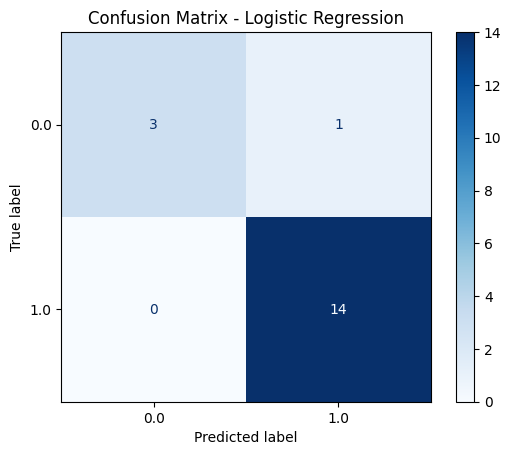

In [177]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=final_model.named_steps['logisticregression'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [178]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (correctly predicted failures): {tn}")
print(f"False Positives (predicted success but failed): {fp}")
print(f"False Negatives (predicted failure but succeeded): {fn}")
print(f"True Positives (correctly predicted successes): {tp}")


True Negatives (correctly predicted failures): 3
False Positives (predicted success but failed): 1
False Negatives (predicted failure but succeeded): 0
True Positives (correctly predicted successes): 14


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
